# DIG_IMAGE_HOMEWORK_MORPHOLOGY
## 6031040921 Phatcharapon Jumruspun

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show(src, t):
  plt.imshow(src, cmap='gray')
  plt.title(t)
  plt.show()

# 1) Fill in the Region


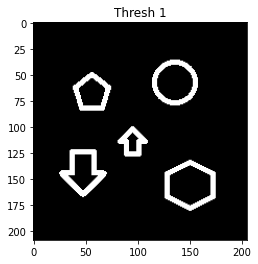

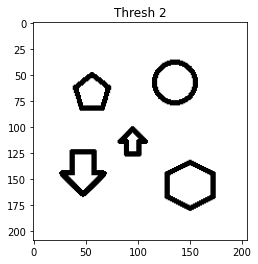

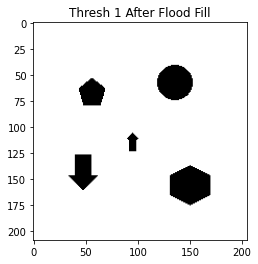

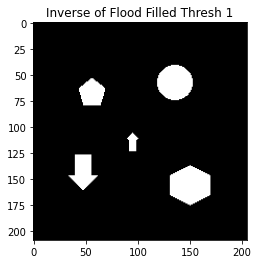

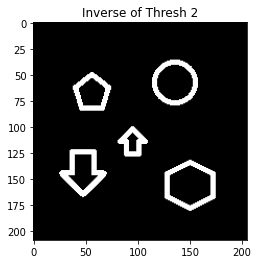

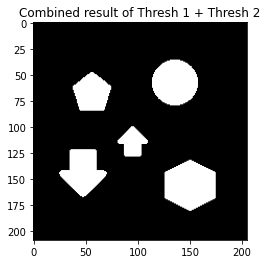

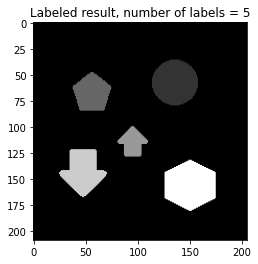

In [ ]:
img = cv2.imread("5objects.png", 0)

ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

show(thresh, "Thresh 1")
show(thresh2, "Thresh 2")

h, w = thresh.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(thresh, mask, (0, 0), 255)

show(thresh, "Thresh 1 After Flood Fill")

inv1 = 255-thresh
inv2 = 255-thresh2

show(inv1, "Inverse of Flood Filled Thresh 1")
show(inv2, "Inverse of Thresh 2")

final = inv1+inv2

show(final, "Combined result of Thresh 1 + Thresh 2")

connected = cv2.connectedComponentsWithStats(final, 8, cv2.CV_32S)
show(connected[1], f"Labeled result, number of labels = {connected[0]-1}")

# 2) Counting Bacteria

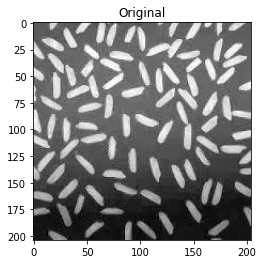

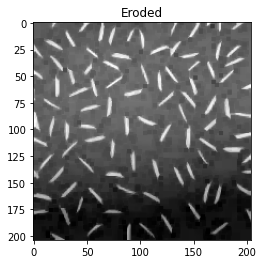

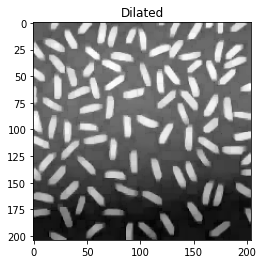

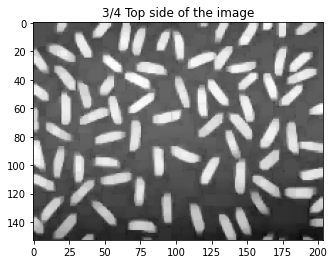

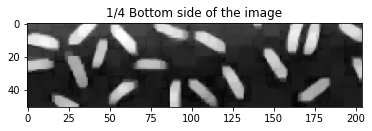

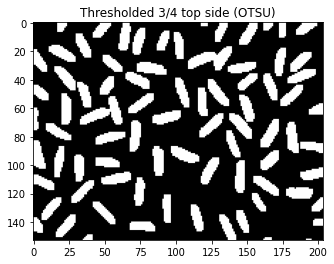

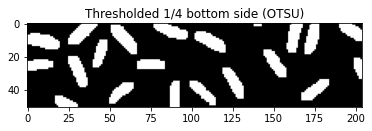

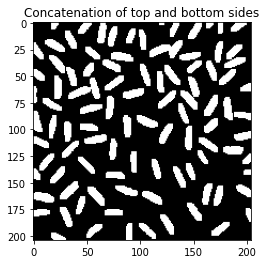

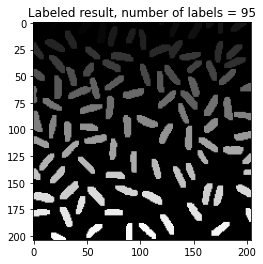

In [ ]:
kernel = np.ones((4, 4), np.uint8)

img = cv2.imread('bacteria.png', 0)
show(img, "Original")

erosion = cv2.erode(img, kernel, iterations = 1)
show(erosion, "Eroded")

dilation = cv2.dilate(erosion, kernel)
show(dilation, "Dilated")

h, w = dilation.shape
h1, h2 = dilation[:h*3//4,:], dilation[h*3//4:,:]
show(h1, "3/4 Top side of the image")
show(h2, "1/4 Bottom side of the image")

ret, thresh = cv2.threshold(h1, 0, 255, cv2.THRESH_OTSU)
ret2, thresh2 = cv2.threshold(h2, 0, 255, cv2.THRESH_OTSU)
show(thresh, "Thresholded 3/4 top side (OTSU)")
show(thresh2, "Thresholded 1/4 bottom side (OTSU)")

concat = np.concatenate((thresh, thresh2))
show(concat, "Concatenation of top and bottom sides")

connected = cv2.connectedComponentsWithStats(concat, 8, cv2.CV_32S)
show(connected[1], f"Labeled result, number of labels = {connected[0]-1}")

# 3) Spore Counting
## 3.1) Method
1. Invert color for easier understanding
2. Threshold the image
3. Erode and dilate the image with different kernel size (preferably erode a lot and dilate only until the image is fixed)

## 3.2) Measuring Performance
I measure the performance by manually counting the real spore numbers
The first image has 12, and the second image has 81

## 3.3) How was the performance?

```
Performance = 1 - abs(counted-real)/real
```

The performance of the first image is 1.0 (100%) while the second image was 0.81 (81%)



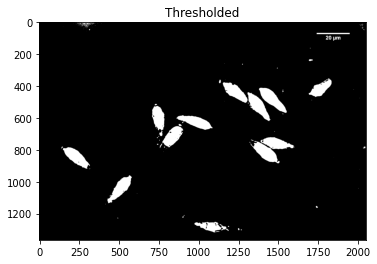

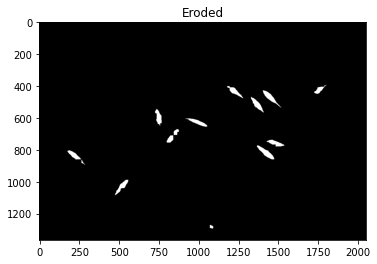

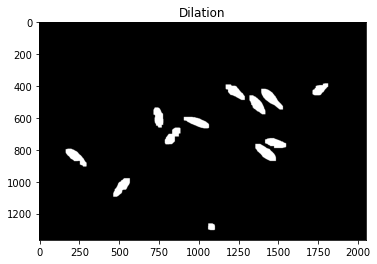

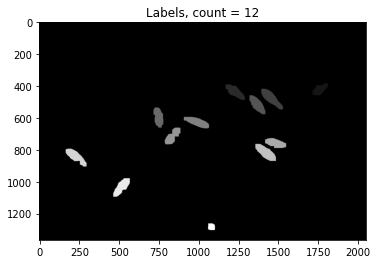

Performance was 1.0


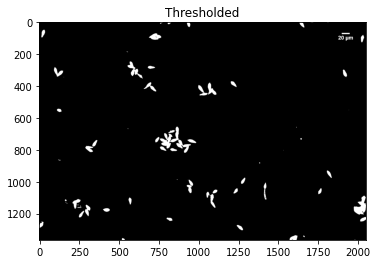

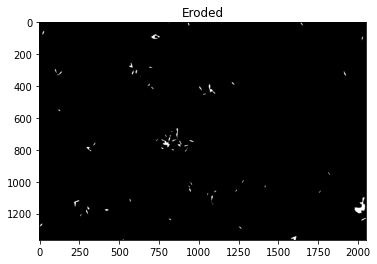

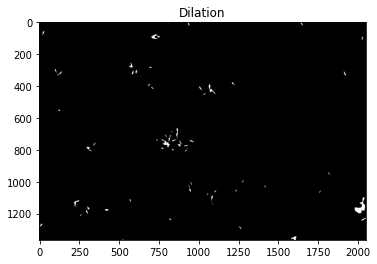

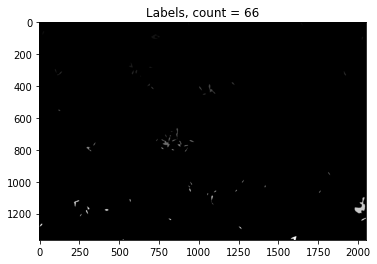

Performance was 0.8148148148148149


In [ ]:
far = cv2.imread("spore1.jpg", 0)
close = cv2.imread("spore2.jpg", 0)

def count(src, kernel_e_size=15, kernel_d_size=15):
  kernel_erode = np.ones((kernel_e_size, kernel_e_size), np.uint8)
  kernel_dilate = np.ones((kernel_d_size, kernel_d_size), np.uint8)

  # invert for easier understanding
  inv = 255-src 

  ret, thresh = cv2.threshold(inv, 0, 255, cv2.THRESH_OTSU)
  show(thresh, "Thresholded")

  erosion = cv2.erode(thresh, kernel_erode, iterations = 1)
  show(erosion, "Eroded")

  dilation = cv2.dilate(erosion, kernel_dilate)
  show(dilation, "Dilation")

  connected = cv2.connectedComponentsWithStats(dilation, 8, cv2.CV_32S)
  show(connected[1], f"Labels, count = {connected[0]-1}")
  return connected[0]-1


close_counted = count(close, 31, 21) # 12
print(f"Performance was {1-np.abs(close_counted-12)/12}")
far_counted = count(far, 11, 1) # 81
print(f"Performance was {1-np.abs(far_counted-81)/81}")